# Recap - The Cars Dataset

In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4 - MACHINE LEARNING

## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2 - Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4 - Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

# 🚗 The Cars dataset

👇 Run the code down below to import the [***ML_Cars_Recap_dataset.csv dataset***](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv) - _this version is slightly different from the one in the challenge 3._

In [2]:
aws_url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv"
cars = pd.read_csv(aws_url)
cars.head()


# Note: It is a common practice to store csv online. This one is stored on the AWS account of LeWagon

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


In [3]:
cars.shape # 205 cars x 8 features

(205, 8)

ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt).

❓ **Question (Information)** ❓ Collect some basic information about your dataset.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carwidth        205 non-null    float64
 2   curbweight      205 non-null    float64
 3   enginetype      205 non-null    object 
 4   cylindernumber  205 non-null    object 
 5   stroke          205 non-null    float64
 6   peakrpm         205 non-null    float64
 7   price           205 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.9+ KB


# (1) 🛠 Data preparation

## (1.0) Pre-requisites

❓ **Question (Potential anomalies)** ❓ 

- Are there columns which need to be modified because of their data types? 
    - Please proceed accordingly.

In [6]:
cars.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


In [10]:
cars.select_dtypes(include=["object"]).value_counts()

aspiration  enginetype  cylindernumber  price    
std         ohc         four            cheap        70
                                        expensive    41
turbo       ohc         four            expensive    15
std         ohcf        four            cheap         7
            ohcv        six             expensive     7
            ohc         six             expensive     6
turbo       ohc         five            expensive     6
            l           four            expensive     6
std         dohc        six             expensive     6
            l           four            expensive     5
            ohc         five            expensive     5
            dohc        four            expensive     4
            rotor       two             expensive     4
turbo       ohc         four            cheap         4
std         ohcv        eight           expensive     4
            ohcf        six             expensive     3
                        four            expensive     

In [11]:
cars["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [12]:
mapping = {
    'four': 4, 
    'six': 6, 
    'five': 5, 
    'three': 3, 
    'twelve':12, 
    'two':2, 
    'eight':8
}
mapping

{'four': 4,
 'six': 6,
 'five': 5,
 'three': 3,
 'twelve': 12,
 'two': 2,
 'eight': 8}

In [16]:
cars["cylindernumber"] = cars["cylindernumber"].replace(mapping)
cars["cylindernumber"]

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [15]:
cars["cylindernumber"].map(mapping)

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [17]:
cars.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive


## (1.1) Duplicates

❓ **Question (Duplicated rows)** ❓ 

Compute the number of duplicated rows that the cars dataset has.

In [19]:
cars.duplicated().sum()

14

❓ **Question (Remove duplicates)** ❓ 

In [21]:
cars.drop_duplicates(inplace=True)

In [22]:
cars.shape

(191, 8)

## (1.2) Missing data

❓ **Question (`NaN`)** ❓ 

What is the percentage of `NaN` for each feature?

In [23]:
cars.isna().sum()

aspiration        0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

<details>
    <summary><i>Answer</i></summary>
    
😇 It is a miracle but we do not have missing values here. You can move to the next section of this notebook :) 
    
</details>

## (1.3) Defining the features $X$ and the target $y$

❓ **Question** ❓

- Store the features of this dataset in a variable $X$
- Store the target in a variable $y$.

In [24]:
cars.head()

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
5,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive


In [25]:
y = cars["price"]
y

0      expensive
2      expensive
3      expensive
4      expensive
5      expensive
         ...    
200    expensive
201    expensive
202    expensive
203    expensive
204    expensive
Name: price, Length: 191, dtype: object

In [27]:
X = cars.drop(columns=["price"])
X

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,64.10000,2548.0,dohc,4,2.68,5000.0
2,std,65.50000,2823.0,ohcv,6,3.47,5000.0
3,std,65.88794,2337.0,ohc,4,3.40,5500.0
4,std,66.40000,2824.0,ohc,5,3.40,5500.0
5,std,66.30000,2507.0,ohc,5,3.40,5500.0
...,...,...,...,...,...,...,...
200,std,68.90000,2952.0,ohc,4,3.15,5400.0
201,turbo,68.80000,3049.0,ohc,4,3.15,5300.0
202,std,68.90000,3012.0,ohcv,6,2.87,5500.0
203,turbo,68.90000,3217.0,ohc,6,3.40,4800.0


❓ **Question (Quick look at the target)** ❓ What is the proportion of "cheap" cars vs. "expensive" cars ? 

In [31]:
(y.value_counts() / len(y)) * 100

expensive    61.256545
cheap        38.743455
Name: price, dtype: float64

## (1.4) Scaling numerical features

❓ **Question (quick glance at the numerical columns)** ❓

- Show the boxplots of all the numerical columns in one line of code
- Do the same with their distributions using histograms

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

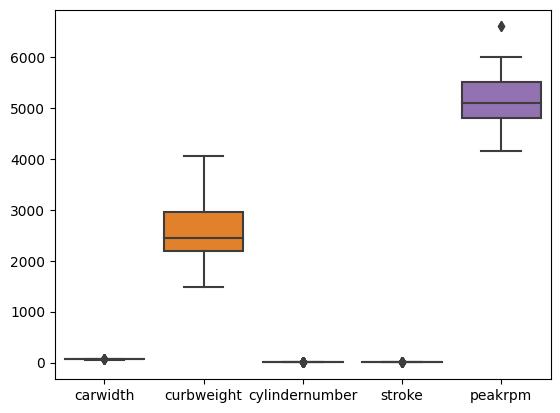

In [32]:
sns.boxplot(data=cars)

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

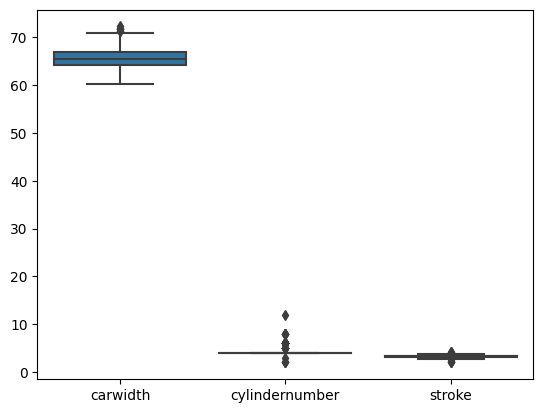

In [34]:
sns.boxplot(data=cars[["carwidth", "cylindernumber", "stroke"]])

❓ **Question (Focus on the numerical columns)** ❓

Store the numerical columns of the cars dataset into `cars_num`.

In [35]:
###########################
# Manual solution         # - not very smart
###########################

# num_features = ["carwidth", "curbweight", "cylindernumber", "stroke", "peakrpm"]
# cars_num = X[num_features]

# That is one way to select the numerical features...
# But not very smart...

###########################
# Elegant solution        # - much better
###########################

cars_num = X.select_dtypes(exclude = ['object']) # selecting only the numerical features
cars_num

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,64.10000,2548.0,4,2.68,5000.0
2,65.50000,2823.0,6,3.47,5000.0
3,65.88794,2337.0,4,3.40,5500.0
4,66.40000,2824.0,5,3.40,5500.0
5,66.30000,2507.0,5,3.40,5500.0
...,...,...,...,...,...
200,68.90000,2952.0,4,3.15,5400.0
201,68.80000,3049.0,4,3.15,5300.0
202,68.90000,3012.0,6,2.87,5500.0
203,68.90000,3217.0,6,3.40,4800.0


❓ **Question (Robust Scaler)** ❓

👨🏻‍🏫 Robust Scaling all the numerical features is a quick and efficient way of scaling.

In [36]:
# Instantiating a RobustScaler
robust_scaler = RobustScaler()

# Creating a copy of the original numerical features 
cars_num_scaled = cars_num.copy()

# Scaling the features and storing them in the copy
cars_num_scaled = pd.DataFrame(robust_scaler.fit_transform(cars_num_scaled),
                               columns = cars_num.columns)

# Showing the scaled features
cars_num_scaled

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,-0.555556,0.135659,0.0,-2.033333,-0.142857
1,-0.037037,0.490956,2.0,0.600000,-0.142857
2,0.106644,-0.136951,0.0,0.366667,0.571429
3,0.296296,0.492248,1.0,0.366667,0.571429
4,0.259259,0.082687,1.0,0.366667,0.571429
...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571
187,1.185185,0.782946,0.0,-0.466667,0.285714
188,1.222222,0.735142,2.0,-1.400000,0.571429
189,1.222222,1.000000,2.0,0.366667,-0.428571


## (1.5) Encoding categorical features

❓ **Question (Focus on the categorical columns)** ❓

Store the categorical columns of the cars dataset into `cars_categorical`.

❓ **Question: What is the expected number of columns generated if we encode the categorical features** ❓

In [39]:
cars_categorical["aspiration"].value_counts()

std      156
turbo     35
Name: aspiration, dtype: int64

In [40]:
cars_categorical.columns

Index(['aspiration', 'enginetype'], dtype='object')

In [50]:
cars_categorical["enginetype"].value_counts()/ len(cars_categorical)

ohc      0.722513
ohcf     0.073298
ohcv     0.068063
dohc     0.057592
l        0.057592
rotor    0.015707
dohcv    0.005236
Name: enginetype, dtype: float64

❓ **Question (OneHotEncoder): Encode the categorical features** ❓

<details>
    <summary><i>Hints</i></summary>
    
- Drop a column when a categorical feature is binary
- Use full matrixes (Sklearn estimators don't understand sparse matrixes)
- Store them into a Pandas DataFrame called `encoded_features`
    - 💡 Once that the OHE is fitted to a DataFrame, the new columns' names are accessible through _`get_features_names_out()`_
    
</details>

In [51]:
ohe = OneHotEncoder(drop="if_binary", sparse=False, min_frequency=.02)
ohe

OneHotEncoder(drop='if_binary', min_frequency=0.02, sparse=False)

In [52]:
cars_categorical_encoded = ohe.fit_transform(cars_categorical)
cars_categorical_encoded

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [53]:
cars_categorical_encoded.shape

(191, 7)

In [49]:
pd.DataFrame(cars_categorical_encoded, columns=ohe.get_feature_names_out())

,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
cars_categorical_encoded_df = pd.DataFrame(cars_categorical_encoded, columns=ohe.get_feature_names_out())
cars_categorical_encoded_df

,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## (1.6) Concatenating all the preprocessed features together $X_{preprocessed}$

❓ **Question (aggregating all the preprocessed features together)** ❓

Concatenate `cars_num_scaled` and `encoded_features` into `X_preprocessed`

In [59]:
X_preprocessed = pd.concat([cars_categorical_encoded_df, cars_num_scaled], axis=1)
X_preprocessed

,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.555556,0.135659,0.0,-2.033333,-0.142857
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.037037,0.490956,2.0,0.600000,-0.142857
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.106644,-0.136951,0.0,0.366667,0.571429
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.296296,0.492248,1.0,0.366667,0.571429
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.259259,0.082687,1.0,0.366667,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.222222,0.657623,0.0,-0.466667,0.428571
187,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.185185,0.782946,0.0,-0.466667,0.285714
188,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.222222,0.735142,2.0,-1.400000,0.571429
189,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.222222,1.000000,2.0,0.366667,-0.428571


## (1.7) Encoding the target

❓ **Question (Encoding the categorical target)** ❓

Encode the target using 📚[***LabelEncoder***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [60]:
y.unique()

array(['expensive', 'cheap'], dtype=object)

In [62]:
lencoder = LabelEncoder()
lencoder.fit(y)

LabelEncoder()

In [63]:
lencoder.classes_

array(['cheap', 'expensive'], dtype=object)

In [65]:
y_encoded = lencoder.transform(y)
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# (2) 🏋🏻‍♂️ Modeling (Logistic Regression)

🎯 Our goal is to predict whether a car will be expensive or cheap based on some features.

## (2.0) Cross-Validation

👩‍🏫 In Machine Learning, when you want to compare different models, a Cross Validation is a robust method to roughly assess the performance of each individual submodel.

❓ **Question (CrossValidation)** ❓

What is the potential performance of a LogisticRegression for this dataset?

In [67]:
cv_results = cross_validate(LogisticRegression(), X_preprocessed, y_encoded, cv=5)
cv_results["test_score"].mean()

0.9004048582995952

- 🚀 This accuracy is promising, let's go further !
- 🗣 We will discuss what is a good Regression/Classification model in the `Performance Metrics` unit.

## (2.1) Holdout Method

❓ **Question (Holdout): train/test split your dataset with a 70/30 ratio** ❓

<details>
    <summary><i>Hint</i></summary>

- For a binary target, you actually don't have to use to `LabelEncoder`.
    - Sklearn is smart enough to detect a binary target.
    
</details>

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((133, 12), (58, 12), (133,), (58,))

## (2.2) Training and evaluating

❓ **Question: Train/Evaluate a Logistic Regression model** ❓

In [96]:
X_train.shape

(133, 12)

In [72]:
# Instantiate a Logistic Regression model
logreg = LogisticRegression(max_iter = 100)

# Train the model
logreg.fit(X_train, y_train)

# Evaluate the model
logreg.score(X_test, y_test)

0.9310344827586207

## (2.3) Predicting

❓ **Question (Predicting a new "point")**❓

Does your ML algorithm (the Logistic Regression you've just trained) think that a car with the following features will be expensive? 

In [73]:
new_car = pd.DataFrame(columns = X.columns)
new_car.loc[0] = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


> 👨🏻‍🏫 **To make a prediction, this new car has to be through the same transformations as the ones performed in the training set!**

🌠 Have a look at the big picture of this recap [here](https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/prepare_dataset_fit_transform.png)!

In [74]:
# 0 - Fixing abnormal data

new_car["cylindernumber"] = 4
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,4,3.11,5400.0


In [82]:
new_car_num = new_car.select_dtypes(exclude=["object"])
new_car_num

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,65.88794,1874.0,4,3.11,5400.0


In [89]:
# 1 - Scaling the numerical features

new_car_num_scaled = robust_scaler.transform(new_car_num)
new_car_num_scaled = pd.DataFrame(new_car_num_scaled, columns=robust_scaler.get_feature_names_out())
new_car_num_scaled

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,0.106644,-0.735142,0.0,-0.6,0.428571


In [90]:
# 2 - Encoding the categorical features

new_car_cat_encoded = ohe.transform(new_car.select_dtypes(include=["object"]))
new_car_cat_encoded = pd.DataFrame(new_car_cat_encoded, columns=ohe.get_feature_names_out())
new_car_cat_encoded

,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
# 3 - Aggregating the numerical features and categorical features together

new_car_prep = pd.concat([new_car_cat_encoded, new_car_num_scaled], axis=1)
new_car_prep

,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.106644,-0.735142,0.0,-0.6,0.428571


In [101]:
new_car_prep.shape

(1, 12)

In [102]:
new_car_prep.columns

Index(['aspiration_turbo', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_infrequent_sklearn',
       'carwidth', 'curbweight', 'cylindernumber', 'stroke', 'peakrpm'],
      dtype='object')

In [103]:
X_train.columns

Index(['aspiration_turbo', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_infrequent_sklearn',
       'carwidth', 'curbweight', 'cylindernumber', 'stroke', 'peakrpm'],
      dtype='object')

In [104]:
# 4 - Prediction

logreg.predict(new_car_prep)

array([0])

# (3) 🧑🏿‍🏫 Warning about Data Leakage

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/cross_validation_data_leakage.png"  width=600 height=300>

🏁 Congratulations! You are an expert at preparing a dataset now !

🧑🏻‍🏫 Don't forget your flashcards and see you for the next section: `Performance Metrics`!